In [129]:
import numpy as np
import pandas as pd

from keras.layers import Dense,Dropout,Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
from keras.optimizers import Adam,Adagrad,rmsprop
from keras import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("pm_nasa.xlsx")

In [100]:
df.head(5)

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
0,10,-6,10730023,33.55,-86.81,2004,1,1,15.83,0.05,...,31.58,16,6,284.78,39.27,1.57,5.51,88.83,1007.87,29.84
1,11,-6,10731005,33.33,-87.00,2004,1,1,15.83,0.08,...,16.00,16,9,285.39,40.36,1.50,5.61,99.22,1010.66,28.52
2,12,-6,10731009,33.46,-87.31,2004,1,1,15.83,0.07,...,11.29,16,4,285.10,41.93,1.45,5.82,99.00,1014.45,27.63
3,13,-6,10731010,33.55,-86.55,2004,1,1,15.83,0.05,...,25.96,16,9,283.36,44.17,1.16,4.99,82.78,1007.52,26.44
4,14,-6,10732003,33.50,-86.92,2004,1,1,15.83,0.05,...,23.29,16,6,284.78,39.27,1.57,5.51,88.83,1007.87,29.84


In [119]:
from keras import backend as K
import tensorflow as tf
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return (1 - K.square(r))

In [6]:
x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
y = pd.DataFrame(df[['PM24H']])

In [126]:
#model1
def create_mlp(dim, regress=False):
    # defining MLP
    model = Sequential()
    model.add(Dense(32, input_dim=dim, activation="relu",kernel_initializer='normal'))
    model.add(Dense(64, activation="relu",kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128,activation="sigmoid",kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64,activation="relu",kernel_initializer='normal'))
#     model.dropout(rate=.3)
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="relu"))

    # return our model
    return model

In [111]:
def create_mlp2(dim):
    model = Sequential()
    model.add(Dense(6, input_dim=dim, activation='relu',kernel_initializer='normal'))
    #model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu',kernel_initializer='normal'))
    #model.add(Dropout(0.1))
    model.add(Dense(1, activation='relu'))
    return model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

In [208]:
# (trainX,testX,validX) = process_house_attributes(x,train,test,valid)

In [209]:
testX.shape

(4657, 6)

In [210]:
validX.shape

(3725, 6)

In [131]:
model = create_mlp(X_train.shape[1],regress=True)
# model = create_mlp(X_train.shape[1], regress=True)
opt = Adam(lr=0.01)
model.compile(loss="mean_squared_error", optimizer=opt)
# #train the model
print("Training Model: - ")
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=40, batch_size=8)

Training Model: - 
Train on 14900 samples, validate on 3725 samples
Epoch 1/40
14900/14900 [==============================] - 18s 1ms/step - loss: 51.7403 - val_loss: 46.2715
Epoch 2/40
14900/14900 [==============================] - 15s 978us/step - loss: 43.5562 - val_loss: 47.2312
Epoch 3/40
14900/14900 [==============================] - 14s 944us/step - loss: 42.7154 - val_loss: 55.2199
Epoch 4/40
14900/14900 [==============================] - 15s 993us/step - loss: 41.2071 - val_loss: 43.3758
Epoch 5/40
14900/14900 [==============================] - 16s 1ms/step - loss: 40.3710 - val_loss: 66.0417
Epoch 6/40
14900/14900 [==============================] - 14s 945us/step - loss: 40.2675 - val_loss: 44.7293
Epoch 7/40
14900/14900 [==============================] - 14s 935us/step - loss: 39.7486 - val_loss: 48.7424
Epoch 8/40
14900/14900 [==============================] - 14s 962us/step - loss: 39.6179 - val_loss: 51.6036
Epoch 9/40
14900/14900 [==============================] - 13s 90

KeyboardInterrupt: 

In [132]:
model = create_mlp2(X_train.shape[1])
# model = create_mlp(X_train.shape[1], regress=True)
opt = Adam(lr=0.1)
model.compile(loss="mean_squared_error", optimizer=opt)
#train the model
print("Training Model: - ")
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=40, batch_size=8)

Training Model: - 
Train on 14900 samples, validate on 3725 samples
Epoch 1/40
14900/14900 [==============================] - 12s 824us/step - loss: 59.8520 - val_loss: 61.5462
Epoch 2/40
14900/14900 [==============================] - 7s 463us/step - loss: 55.8450 - val_loss: 62.6586
Epoch 3/40
14900/14900 [==============================] - 8s 566us/step - loss: 55.6794 - val_loss: 61.6738
Epoch 4/40
14900/14900 [==============================] - 6s 426us/step - loss: 55.6575 - val_loss: 61.5927
Epoch 5/40
14900/14900 [==============================] - 9s 620us/step - loss: 55.6275 - val_loss: 61.6197
Epoch 6/40
14900/14900 [==============================] - 12s 838us/step - loss: 55.6432 - val_loss: 61.6882
Epoch 7/40
14900/14900 [==============================] - 7s 466us/step - loss: 55.6427 - val_loss: 62.0143
Epoch 8/40
13776/14900 [==========================>...] - ETA: 0s - loss: 56.24

KeyboardInterrupt: 

In [92]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=5, batch_size=8)
#Trained for 40 epochs

Train on 14900 samples, validate on 3725 samples
Epoch 1/5
14900/14900 [==============================] - 4s 298us/step - loss: 33.6618 - val_loss: 40.3820
Epoch 2/5
14900/14900 [==============================] - 5s 366us/step - loss: 33.6385 - val_loss: 37.1959
Epoch 3/5
14900/14900 [==============================] - 5s 308us/step - loss: 33.6872 - val_loss: 36.8309
Epoch 4/5
14900/14900 [==============================] - 5s 350us/step - loss: 33.3552 - val_loss: 37.5745
Epoch 5/5
14900/14900 [==============================] - 5s 331us/step - loss: 33.6673 - val_loss: 37.0201


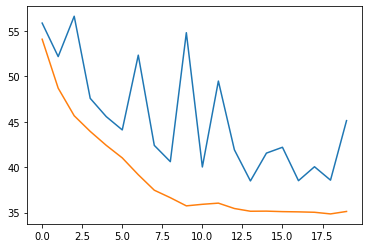

In [79]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 9         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x000002051C37B908>>

In [118]:
# make predictions on the testing data
print("Predicting PM2.5")
preds = model.predict(X_test)
preds
# diff = preds.flatten() - testY
# percentDiff = (diff / testY) * 100
# absPercentDiff = np.abs(percentDiff)
 
# # compute the mean and standard deviation of the absolute percentage
# # difference
# mean = np.mean(absPercentDiff)
# std = np.std(absPercentDiff)
 

# print("[INFO] Mean: {:.2f}%, std: {:.2f}%".format(mean, std))

Predicting PM2.5


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [103]:
y_test.mean(), y_test.std()

(PM24H    15.068881
 dtype: float64, PM24H    7.691221
 dtype: float64)

In [104]:
preds.mean(), preds.std()

(14.5746155, 4.3409123)

In [105]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print(rmse)

5.7625995817199245


In [106]:
r = pearsonr(y_test.values.flatten(),preds.flatten())[0]
r

0.6743251913451427

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

In [31]:
from keras.models import load_model

model.save('deep_NN.h5')

In [101]:
model = load_model('deep_NN.h5')